In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
visa_df=pd.read_csv(r"C:\Users\SIRI\OneDrive\nareshit\EDA\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**box plot**
-  box plot is used for detect outliers
-  box plot has min q1 q2 q3 and max value
-  inside box plot red line represents median which 50 percentile data


**outlier**
- very very huge observation 
- very very small observation
- which pull the data in any side of three distribution
- Mild outliers

    - q1-1.5IQR and q3+1.5IQR
- Strong outliers
    - q1-3IQR and q3+3IQR
- IQR:inter quartile range

    - IQR=Q3-Q1
- q1:25p
- q2:50p
- q3:75p


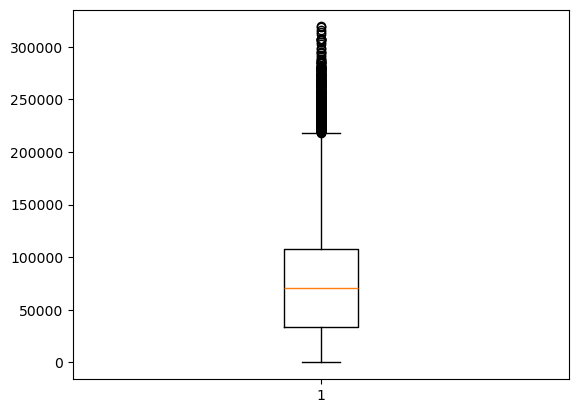

In [6]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

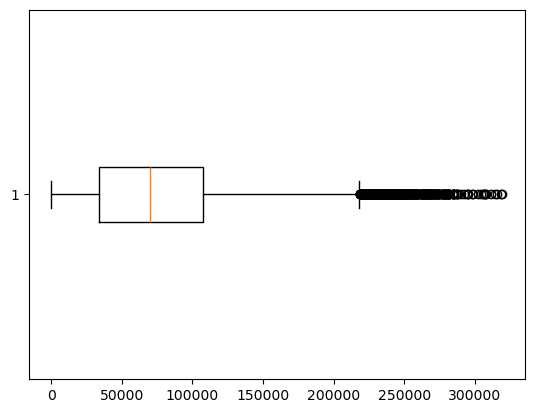

In [7]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

In [8]:
import seaborn as sns

<Axes: >

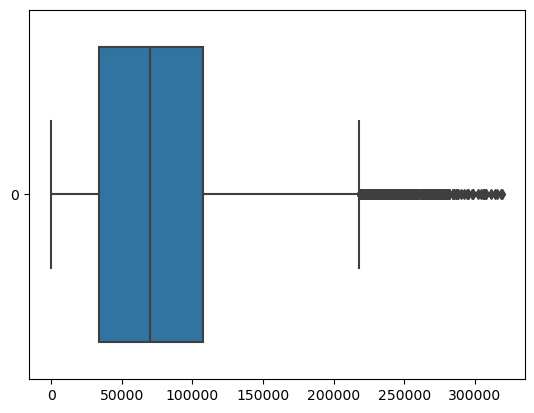

In [9]:
sns.boxplot(visa_df['prevailing_wage'],
            orient='h')

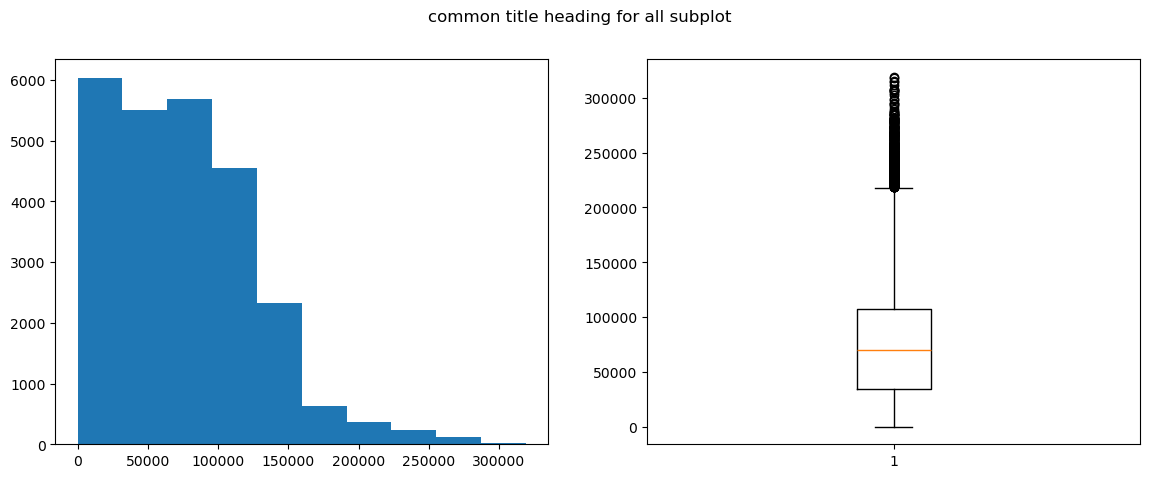

In [11]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

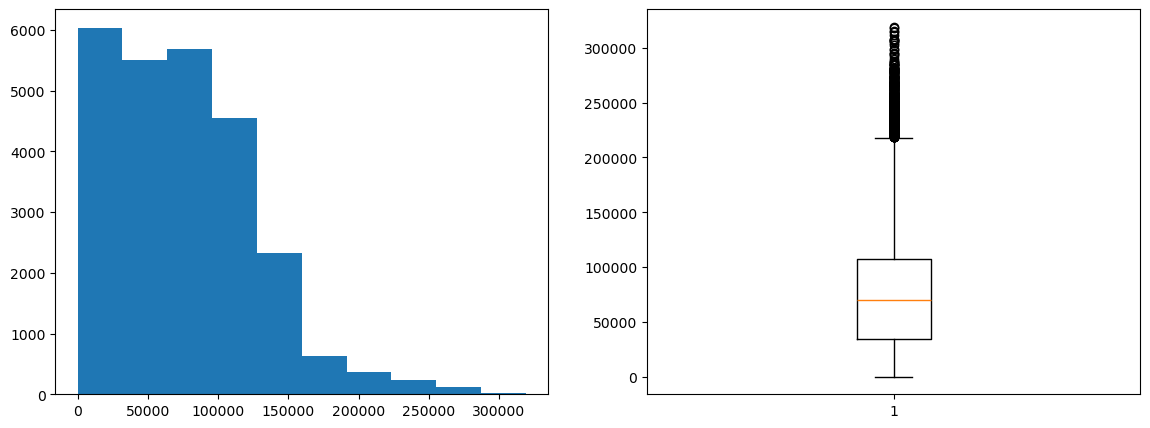

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

**finding the outliers**
- outliers are available less than q1-1.5*IQR
- Outliers are available greater than q3+1.5IQR
- Step1:
- Calucate Q1:25p
- Caulate Q3:75p
-  CaulateIQR:Q3-Q1
- Step-2:
- LB=Q1-1.5*IQR
- UB=Q3+1.5*IQR
- Step-3:
- con1=visa_df['prevailing_wage']<LB
- con2=visa_df['prevailing_wage']>UB
- apply Or opreator and get the outliers data

**outliers data**

In [18]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1|con2]
len(outliers_data)

427

**non outliers data**


In [20]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[ con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

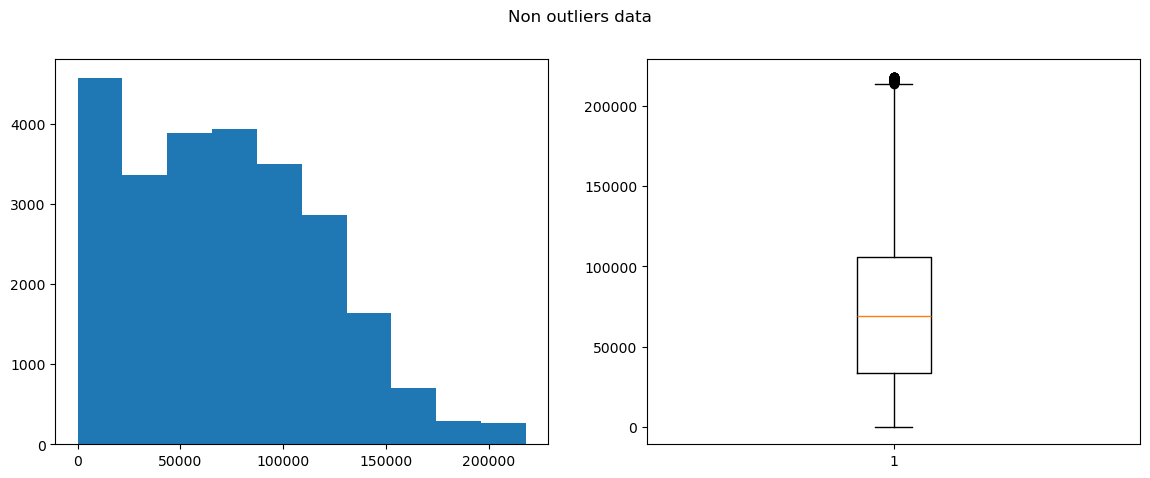

In [21]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053
plt.show()

**comparing Total data with non outliers data**

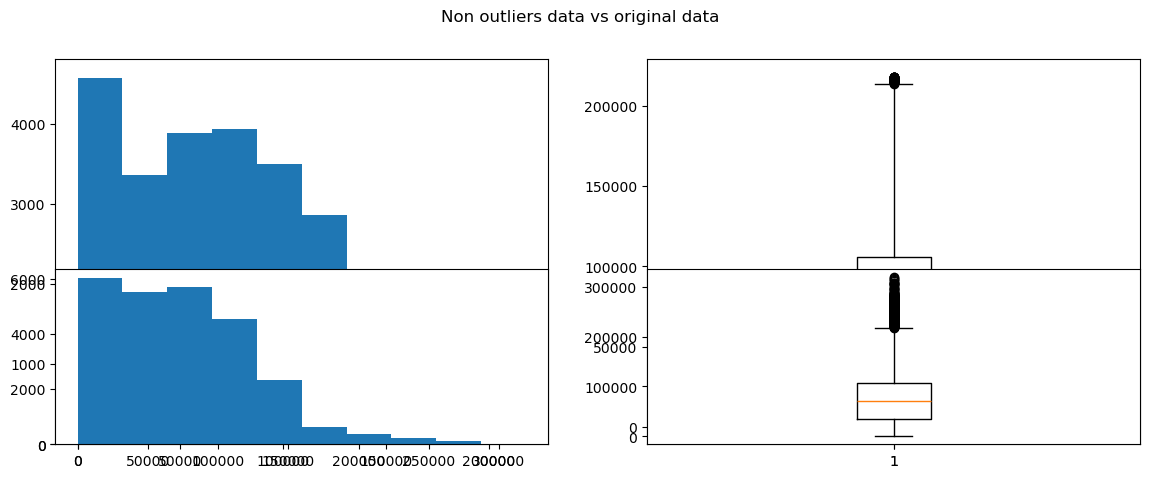

In [23]:
plt.figure(figsize=(14,5)) # 14 units in x axis 5 units in y axis

plt.suptitle('Non outliers data vs original data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) # 25053



plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])  # 25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])  # 25480
plt.show()

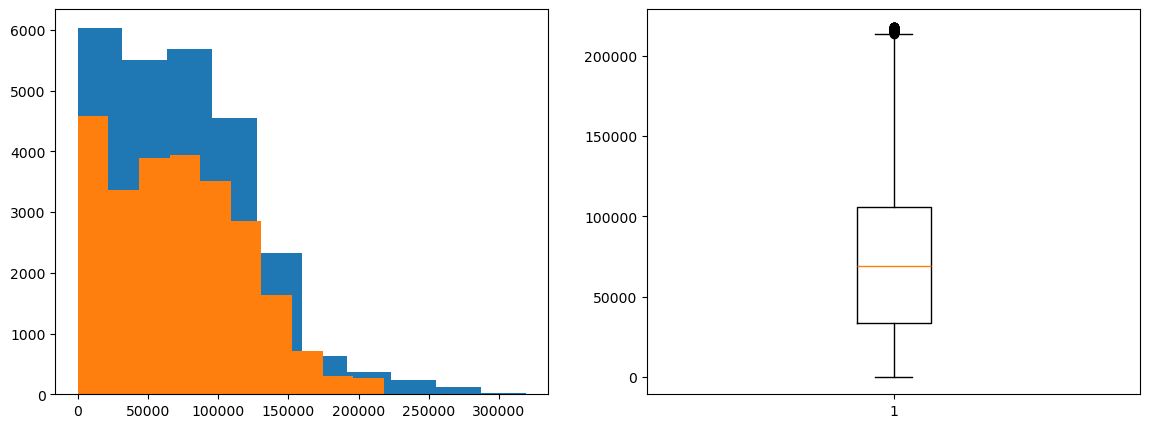

In [24]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) # 25053 
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])  # 25053
plt.show()

**How to deal the outliers**

**Method-1 Drop the outliers**
- Drop the outliers is not a good idea
- when you drop the outliers , data will loss
- for example here we are dropping 427 row
- x% of 25480=427
-it is 1.7% data,here it is fine we can drop the outlier

method-2 fill the median value
- we alredy know that outliers does not affect the medain
- so we can fill outliers by median

method -3 cap the values with Q1 and Q3
- all lessthan lower bound values we replace with q1or LB
- all greater than upper bound values,we can replace  with q3 or UB

Fill with median
-  create a empty list
- calculate median value visa_df ['prevailing_wage'].median
- iterate through visa_df ['prevailing_wage'].values
- if each value i.e ub then append with median values
- else append with i value


In [25]:
for i in visa_df ['prevailing_wage'].values:
    if i<lb or i>ub:

SyntaxError: incomplete input (3744147611.py, line 2)